# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [33]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
from itertools import product
from sklearn.svm import SVC
import numpy as np
def is_shattered(d, n, S_n):
    for labels in product([-1,1], repeat = n):
        if len(set(labels)) == 1:
            continue
        clf = SVC(C = 10000, kernel = 'linear', tol = 1e-5, shrinking = False)
        clf.fit(S_n, labels)
        if clf.score(S_n, labels) < 1:
            return False
    return True

In [34]:
# useful functions to find all possible assigments of classes:
# (I recommend usin combinations, as we don't need to compute the same with the classes swiched)

from itertools import combinations
from itertools import permutations
from itertools import product

In [35]:
d = 2
n = 4
np.random.seed(42)
S_n = np.random.randn(n, d)
is_shattered(d,n,S_n)

False

### c)

In [36]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)
import matplotlib.pyplot as plt
# Create a grid for plotting decision boundaries
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Plot the decision boundaries
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

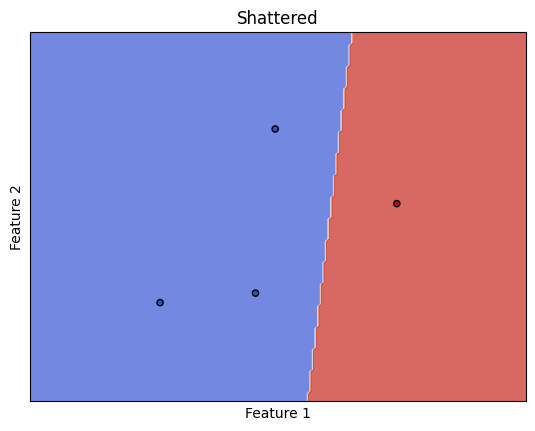

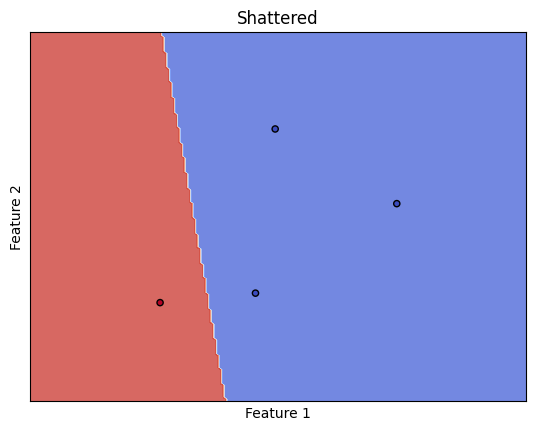

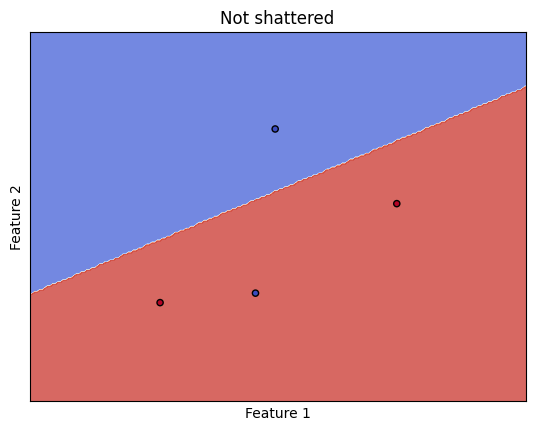

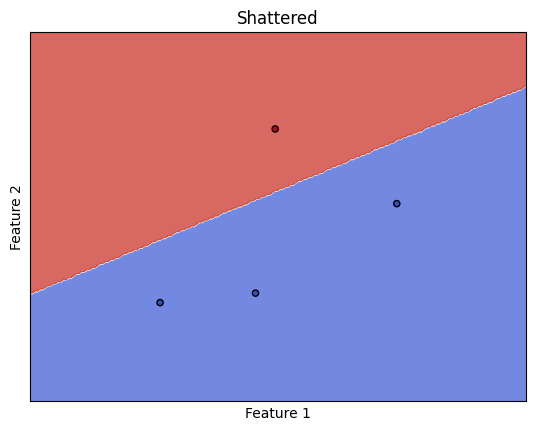

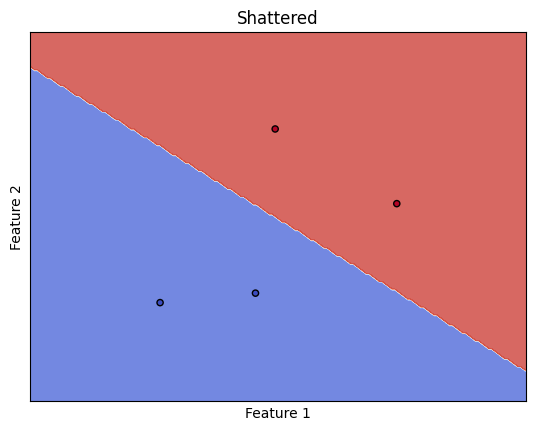

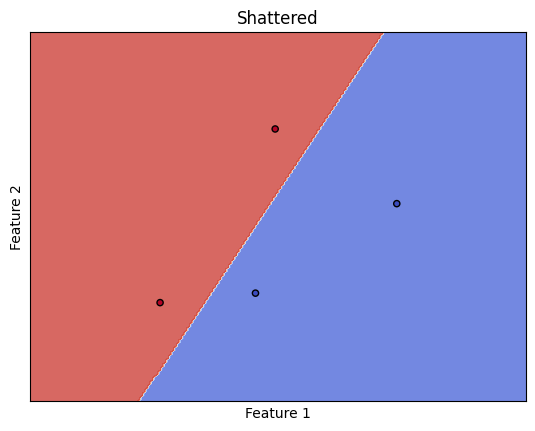

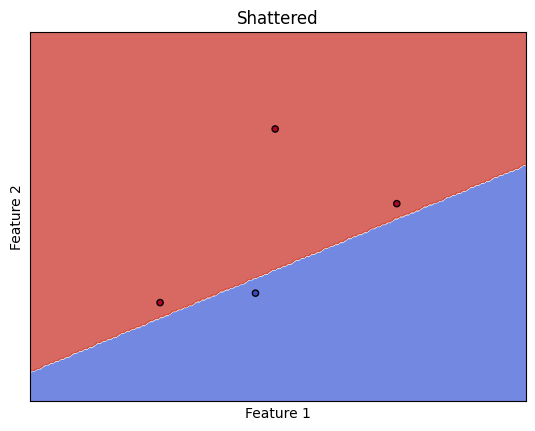

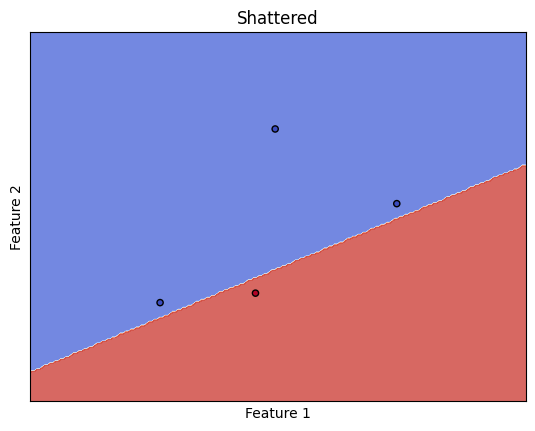

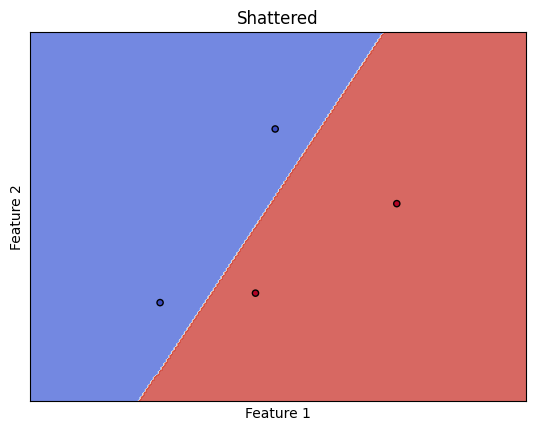

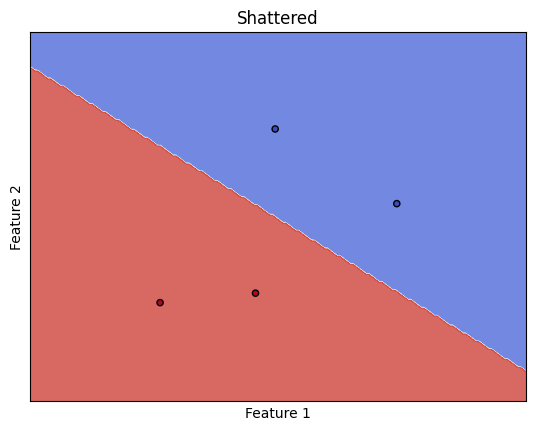

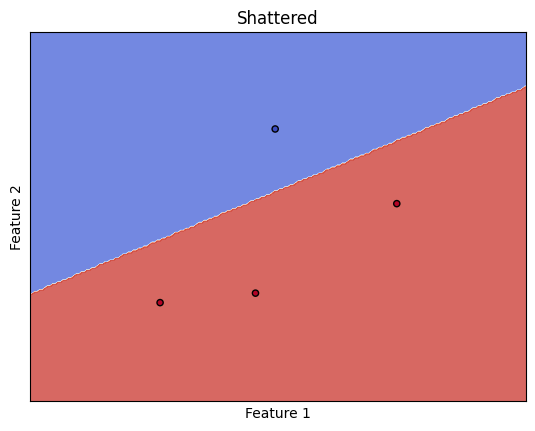

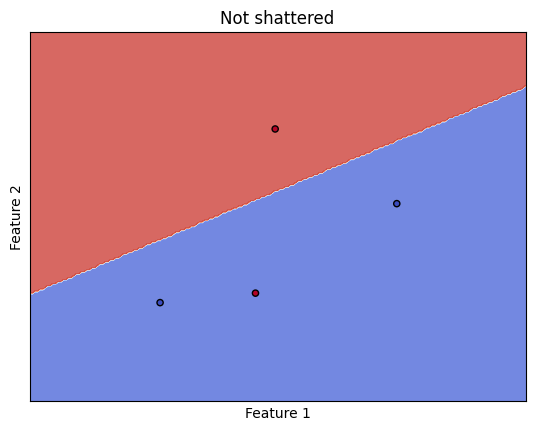

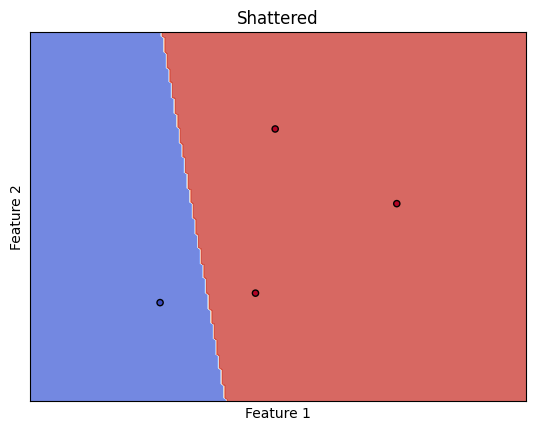

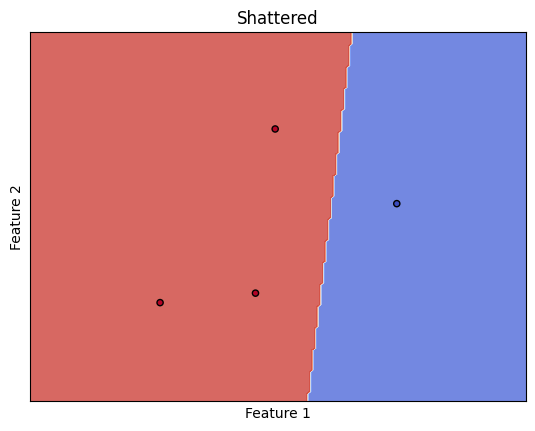

In [37]:
xx, yy = make_meshgrid(S_n[:, 0], S_n[:, 1])
for y in list(product([0, 1], repeat=n)):
    try:
        clf = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        clf.fit(S_n, y)
        plt.figure()
        plot_contours(plt.gca(), clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        plt.scatter(S_n[:, 0], S_n[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xticks(())
        plt.yticks(())
        plt.title('Shattered' if clf.score(S_n, y) == 1 else 'Not shattered')
        plt.show()
    except ValueError as e:
        pass

### d)

In [49]:
# code
def vc_dimension_linear(max_d, max_n, num_samples):
    vc_dimension = []
    for d in range(2, max_d+1):
        vc_dim = 0
        for n in range(1, max_n+1):
            sharttered_count = 0
            for _ in range(num_samples):
                points = np.random.multivariate_normal(np.zeros(d),np.eye(d),size = n)
                if is_shattered(d, n, points):
                    sharttered_count += 1
            if sharttered_count > num_samples/2:
                vc_dim = n
            else:
                break
        vc_dimension.append((d,vc_dim))
    return vc_dimension

In [50]:
vc_dimension_linear(10,10,50)

[(2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 10)]

### e)

In [ ]:
# A hint: change a kernel in SVM